In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the dataset
data = pd.read_csv(r"C:\Users\KIIT\Downloads\ElectricityConsumptionAndProduction.csv")

In [7]:
# Step 1: Preprocess and Clean the Data
# Convert DateTime to datetime type
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [9]:
# Check for duplicates
data = data.drop_duplicates()

In [11]:
# Check for negative values in features where they don't make sense (e.g., Wind)
data['Wind'] = data['Wind'].apply(lambda x: max(x, 0))

In [13]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

Missing values per column:
 DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 46007 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       46007 non-null  datetime64[ns]
 1   Consumption    46007 non-null  int64         
 2   Production     46007 non-null  int64         
 3   Nuclear        46007 non-null  int64         
 4   Wind           46007 non-null  int64         
 5   Hydroelectric  46007 non-null  int64         
 6   Oil and Gas    46007 non-null  int64         
 7   Coal           46007 non-null  int64         
 8   Solar          46007 non-null  int64         
 9   Biomass        46007 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 3.9 MB
None


In [17]:
# Step 2: Exploratory Data Analysis
# Summary statistics
print(data.describe())

                            DateTime   Consumption    Production  \
count                          46007  46007.000000  46007.000000   
mean   2021-08-16 11:33:32.876301056   6587.748821   6518.769013   
min              2019-01-01 00:00:00   3889.000000   3315.000000   
25%              2020-04-24 06:30:00   5773.000000   5814.000000   
50%              2021-08-16 12:00:00   6552.000000   6462.000000   
75%              2022-12-08 16:30:00   7321.000000   7176.000000   
max              2024-03-31 23:00:00   9615.000000   9886.000000   
std                              NaN   1043.599203    986.752998   

            Nuclear          Wind  Hydroelectric   Oil and Gas          Coal  \
count  46007.000000  46007.000000   46007.000000  46007.000000  46007.000000   
mean    1291.168257    792.441389    1857.125959   1171.915122   1193.151760   
min      562.000000      0.000000     175.000000    198.000000    279.000000   
25%     1347.000000    236.000000    1347.000000    858.000000    9

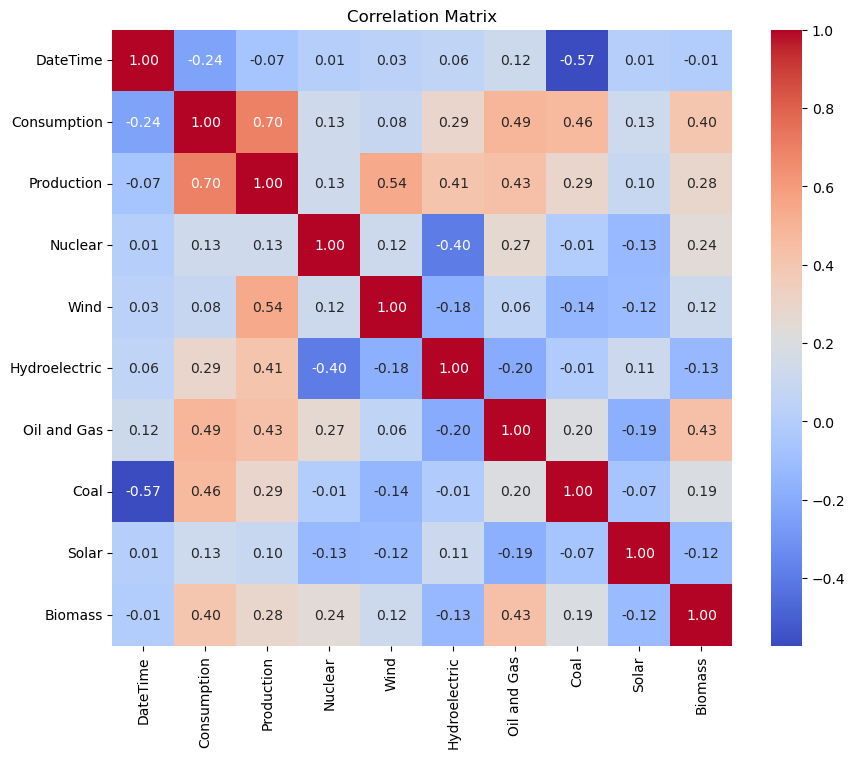

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

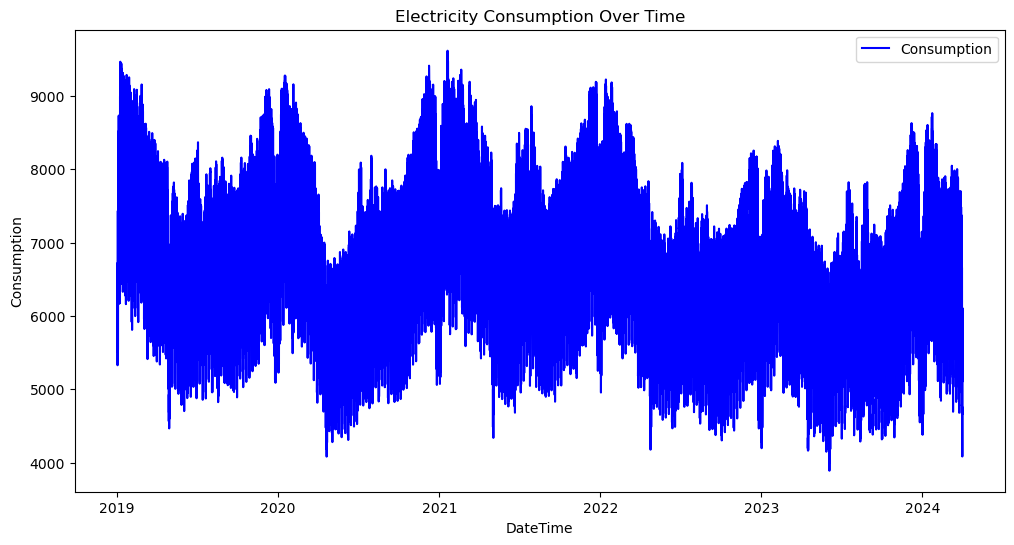

In [21]:
# Plot Consumption vs. DateTime
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Consumption'], label='Consumption', color='blue')
plt.xlabel('DateTime')
plt.ylabel('Consumption')
plt.title('Electricity Consumption Over Time')
plt.legend()
plt.show()

Mean Squared Error: 286668.66
R-squared: 0.74


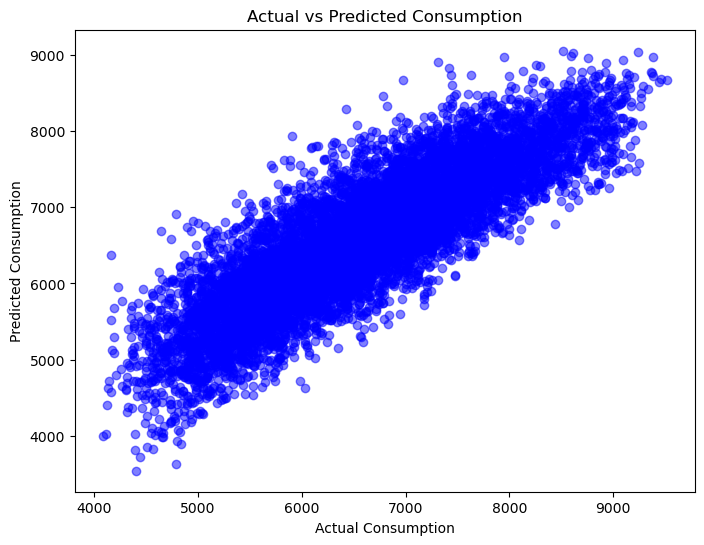

In [23]:
# Step 3: Feature Engineering
# Extract time-based features
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month
# Drop DateTime (no longer needed as we extracted features)
data = data.drop(['DateTime'], axis=1)

# Step 4: Split Data
# Define features (X) and target (y)
X = data.drop('Consumption', axis=1)
y = data['Consumption']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Linear Regression Model
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 7: Plot Predictions vs Actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Actual vs Predicted Consumption')
plt.show()


In [25]:
# Step 4: Split Data
# Define features (X) and target (y)
X = data.drop('Consumption', axis=1)
y = data['Consumption']

In [27]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Step 5: Train Linear Regression Model
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Step 6: Evaluate the Model
# Predictions
y_pred = model.predict(X_test)

In [33]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 286668.66
R-squared: 0.74


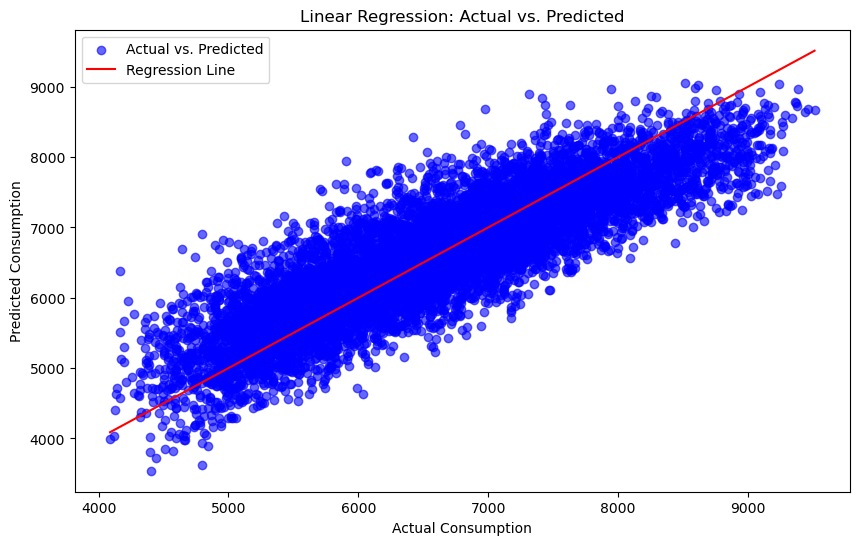

In [35]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs. Predicted')

# Straight line (regression line)
x_line = np.linspace(min(y_test), max(y_test), 100)  # Generate a range of values
plt.plot(x_line, x_line, color='red', label='Regression Line')  # Perfect prediction line

# Labels and title
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("ElectricityConsumptionAndProduction.csv", parse_dates=["DateTime"])

In [39]:
# Feature Engineering - Extracting useful time components
df["Year"] = df["DateTime"].dt.year
df["Month"] = df["DateTime"].dt.month
df["Day"] = df["DateTime"].dt.day
df["Hour"] = df["DateTime"].dt.hour
df.drop("DateTime", axis=1, inplace=True)  # Drop original DateTime column

In [3]:
df.isnull().sum()

NameError: name 'df' is not defined

In [43]:
# Define predictors and target
X = df.drop(columns=["Consumption"])
y = df["Consumption"]

In [45]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
### Logistic Regression (Classification-based approach)
# Convert Consumption into High (1) and Low (0) using median as threshold
df["Consumption_Category"] = (df["Consumption"] > df["Consumption"].median()).astype(int)
y_class = df["Consumption_Category"]
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [51]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_cls, y_train_cls)
y_pred_cls = log_reg.predict(X_test_cls)

In [53]:
# Classification Metrics
print("\nLogistic Regression Classification Report:\n", classification_report(y_test_cls, y_pred_cls))
print("Accuracy Score:", accuracy_score(y_test_cls, y_pred_cls))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4555
           1       0.86      0.85      0.85      4648

    accuracy                           0.85      9203
   macro avg       0.85      0.85      0.85      9203
weighted avg       0.85      0.85      0.85      9203

Accuracy Score: 0.8528740628056068


In [55]:
### Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

In [57]:
# Metrics for Decision Tree
print("\nDecision Tree Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Performance:
MAE: 318.81483504348546
MSE: 178115.67289014262
R2 Score: 0.8391891720120468


In [62]:
### Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

In [63]:
# Metrics for Random Forest
print("\nRandom Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 179.3660708464631
MSE: 62146.26905729654
R2 Score: 0.9438915575406444


In [64]:
### Time Series Forecasting (ARIMA)
# Using only Consumption for time series forecasting
df_ts = df[["Consumption"]]

In [65]:
# Splitting into train and test for time series
train_size = int(len(df_ts) * 0.8)
train, test = df_ts.iloc[:train_size], df_ts.iloc[train_size:]

In [66]:
# Train ARIMA Model
model = ARIMA(train, order=(5,1,0))  # ARIMA(p,d,q)
model_fit = model.fit()
y_pred_arima = model_fit.forecast(len(test))

In [67]:
# Time Series Metrics
print("\nARIMA Performance:")
print("MAE:", mean_absolute_error(test, y_pred_arima))
print("MSE:", mean_squared_error(test, y_pred_arima))
print("R2 Score:", r2_score(test, y_pred_arima))


ARIMA Performance:
MAE: 809.8082275037169
MSE: 948987.9745586585
R2 Score: -0.08404399883104374


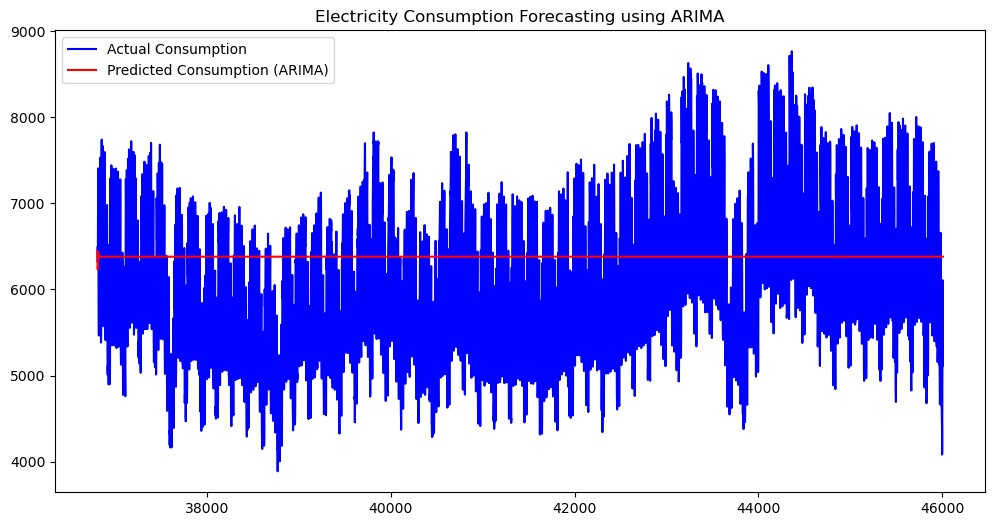

In [68]:
# Plot ARIMA (Autoregressive Integrated Moving Average) Predictions
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label="Actual Consumption", color="blue")
plt.plot(test.index, y_pred_arima, label="Predicted Consumption (ARIMA)", color="red")
plt.legend()
plt.title("Electricity Consumption Forecasting using ARIMA")
plt.show()


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      4605
           1       0.85      0.86      0.86      4598

    accuracy                           0.86      9203
   macro avg       0.86      0.86      0.86      9203
weighted avg       0.86      0.86      0.86      9203

Accuracy Score: 0.8578724329023144


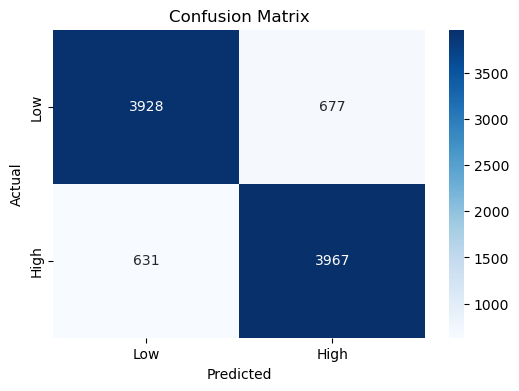

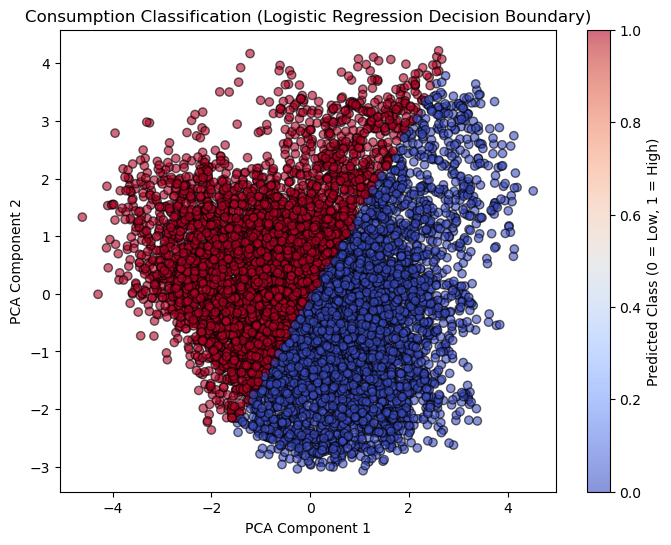

In [69]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("ElectricityConsumptionAndProduction.csv", parse_dates=["DateTime"])

# Feature Engineering - Extracting useful time components
df["Year"] = df["DateTime"].dt.year
df["Month"] = df["DateTime"].dt.month
df["Day"] = df["DateTime"].dt.day
df["Hour"] = df["DateTime"].dt.hour
df.drop("DateTime", axis=1, inplace=True)  # Drop original DateTime column

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Convert "Consumption" into categories (Binary Classification)
median_consumption = df["Consumption"].median()
df["Consumption_Category"] = (df["Consumption"] > median_consumption).astype(int)  # 1 = High, 0 = Low

# Define predictors (X) and target (y)
X = df.drop(columns=["Consumption", "Consumption_Category"])  # Features
y = df["Consumption_Category"]  # Target (High/Low Consumption)

# Train-Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

# Print Classification Report & Accuracy
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualization: Decision Boundary (Using PCA to reduce to 2D for plotting)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce dimensions for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_pca, cmap="coolwarm", alpha=0.6, edgecolors="k")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Consumption Classification (Logistic Regression Decision Boundary)")
plt.colorbar(label="Predicted Class (0 = Low, 1 = High)")
plt.show()

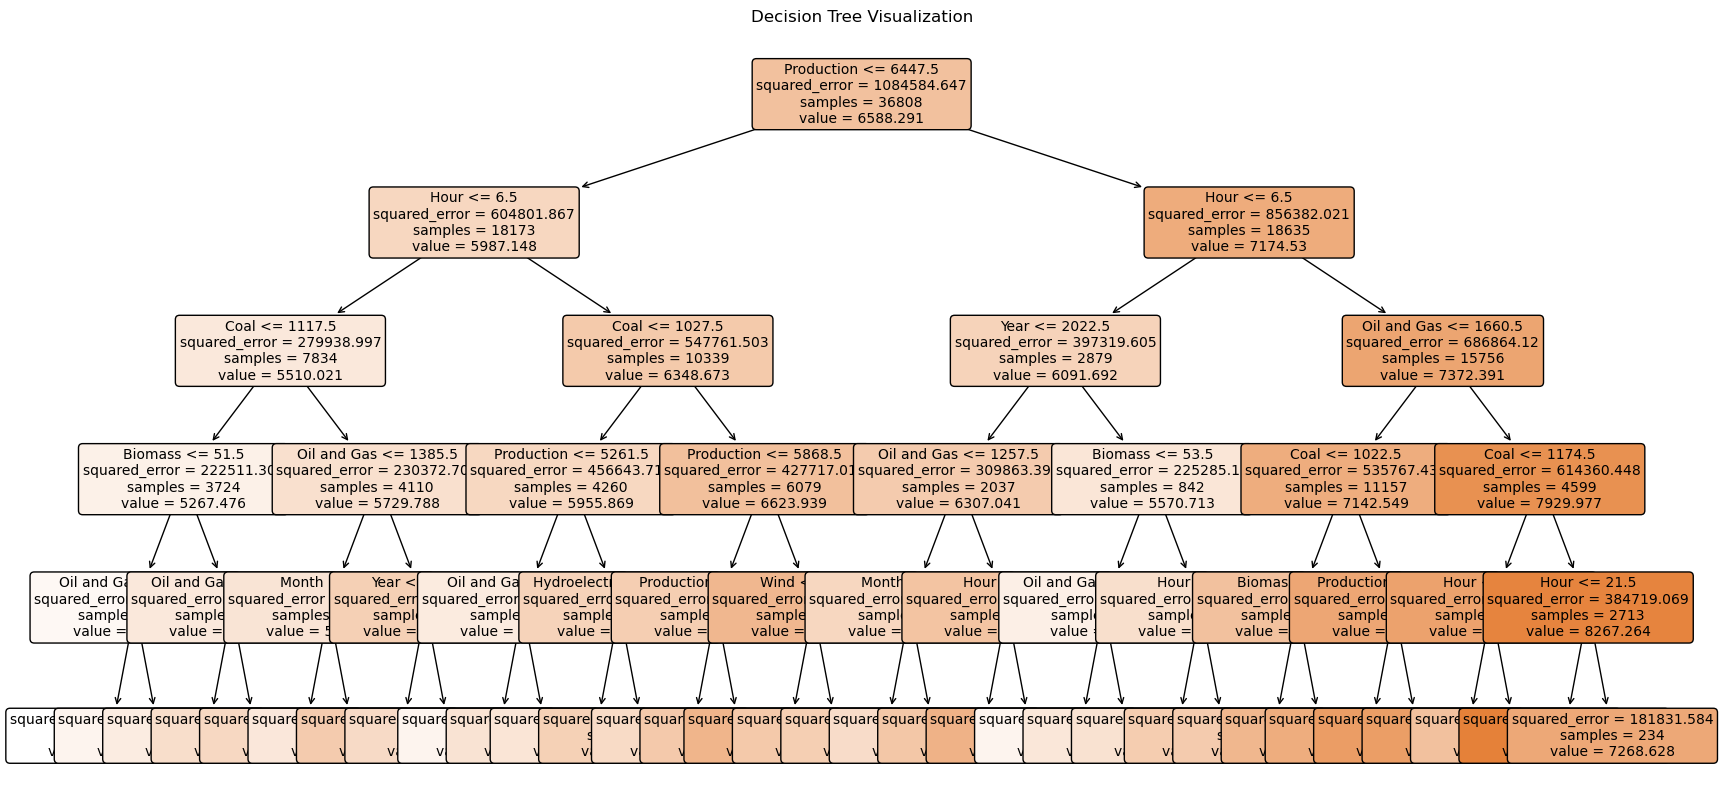

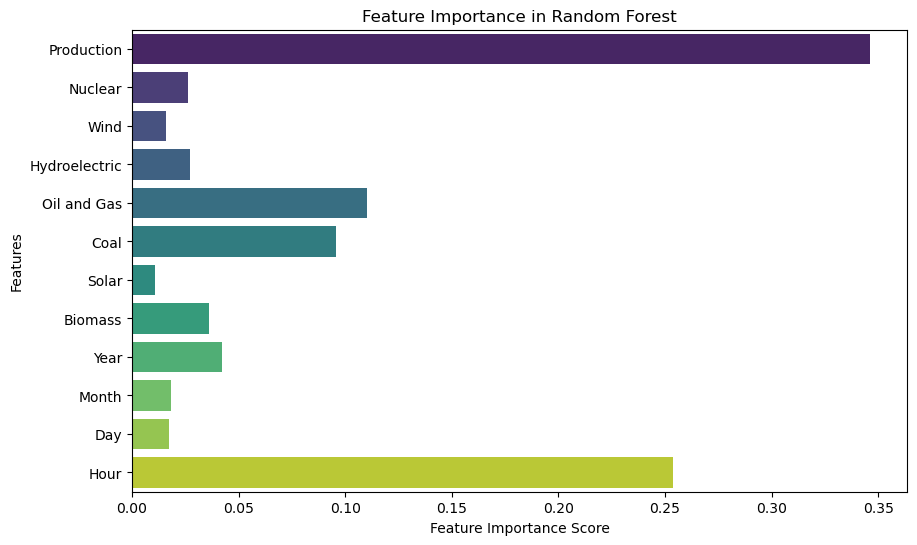

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("ElectricityConsumptionAndProduction.csv", parse_dates=["DateTime"])

# Feature Engineering - Extract useful time components
df["Year"] = df["DateTime"].dt.year
df["Month"] = df["DateTime"].dt.month
df["Day"] = df["DateTime"].dt.day
df["Hour"] = df["DateTime"].dt.hour
df.drop("DateTime", axis=1, inplace=True)  # Drop DateTime column

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Define predictors and target
X = df.drop(columns=["Consumption"])  # Features
y = df["Consumption"]  # Target variable

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limit depth for better visualization
dt_regressor.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Feature Importance Plot (Random Forest)
importances = rf_regressor.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

ARIMA-KNN Hybrid Model Performance:
Mean Squared Error (MSE): 22156.34548702249
Mean Absolute Error (MAE): 117.3136533452121
R-squared Score (R²): 0.974690455511405


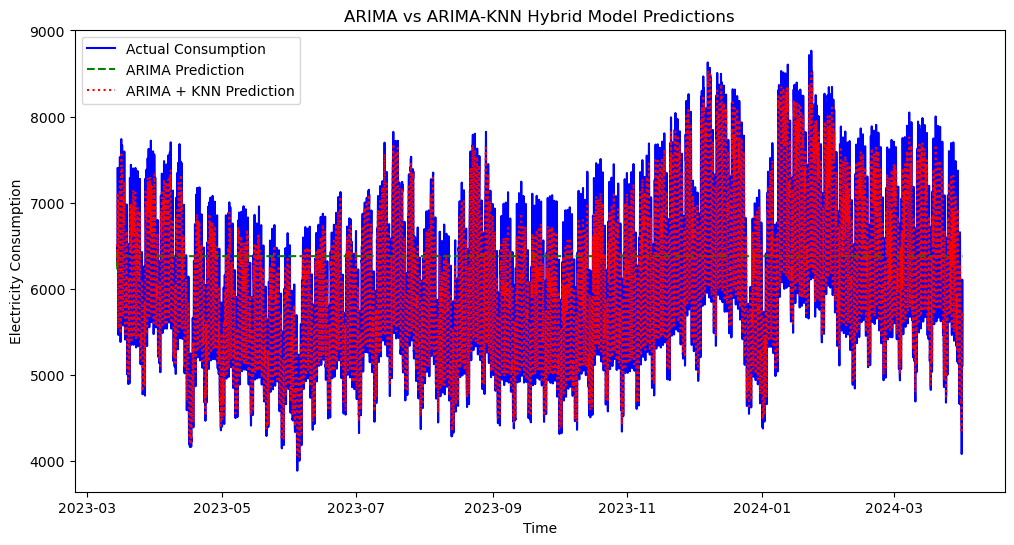

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("ElectricityConsumptionAndProduction.csv", parse_dates=["DateTime"], index_col="DateTime")

# Using only Consumption for prediction
df = df[['Consumption']].dropna()

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Step 1: Train ARIMA Model
arima_order = (5, 1, 0)  # (p, d, q) values can be tuned based on ACF/PACF plots
arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()

# Step 2: ARIMA Predictions & Residual Calculation
# Ensure ARIMA predicts the exact number of test samples
arima_pred = arima_fit.forecast(steps=len(test))[:len(test)]  # Trim to match test length
residuals = test["Consumption"].values - arima_pred  # Convert to NumPy array for compatibility

# Step 3: Train KNN on Residuals
k = 5  # Optimal k value can be tuned
knn_model = KNeighborsRegressor(n_neighbors=k)
X_train = np.arange(len(residuals)).reshape(-1, 1)  # Time as feature
knn_model.fit(X_train, residuals)

# Step 4: Predict Residuals using KNN
X_test = np.arange(len(residuals)).reshape(-1, 1)
knn_residual_pred = knn_model.predict(X_test)

# Step 5: Final Prediction (ARIMA + KNN Residuals)
final_pred = arima_pred + knn_residual_pred

# Evaluation Metrics
mse = mean_squared_error(test["Consumption"], final_pred)
mae = mean_absolute_error(test["Consumption"], final_pred)
r2 = r2_score(test["Consumption"], final_pred)

print(f"ARIMA-KNN Hybrid Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score (R²): {r2}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(test.index, test["Consumption"], label="Actual Consumption", color="blue")
plt.plot(test.index, arima_pred, label="ARIMA Prediction", linestyle="dashed", color="green")
plt.plot(test.index, final_pred, label="ARIMA + KNN Prediction", linestyle="dotted", color="red")
plt.legend()
plt.title("ARIMA vs ARIMA-KNN Hybrid Model Predictions")
plt.xlabel("Time")
plt.ylabel("Electricity Consumption")
plt.show()
